# Import packages

In [1]:
%cd /Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub
import numpy as np
import matplotlib.pyplot as plt
import re
from StructuralAnalysisTools.mdPLOTtools import quickplotxvg, moving_avg, read_xvg

/Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub


# Individual plot

## Equilibrium em

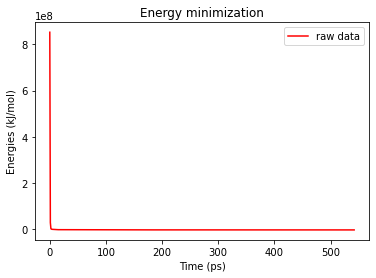

In [2]:
################################
# Parameters
variant = "omicron_BA.1"
wkdir = f'Data/rawdata/md_results/variants_6m0j/{variant}'
################################

# plot
quickplotxvg(wkdir=wkdir, xvgfile="potential_em.xvg", title="Energy minimization", 
            xlab='Time (ps)', ylab='Energies (kJ/mol)', sci_y=True, with_moving_avg=False)


## Equilibrium nvt

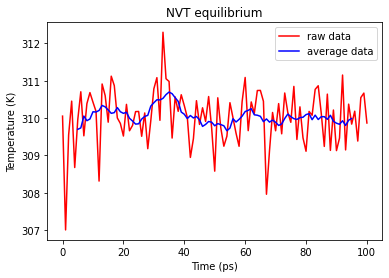

In [3]:
################################
# Parameters
variant = "lambda"
wkdir = f'Data/rawdata/md_results/variants_6m0j/{variant}'
################################

# plot
quickplotxvg(wkdir=wkdir, xvgfile="temperature_nvt.xvg", title="NVT equilibrium", 
            xlab='Time (ps)', ylab='Temperature (K)', with_moving_avg=True)



## Equilibrium npt (pressure)

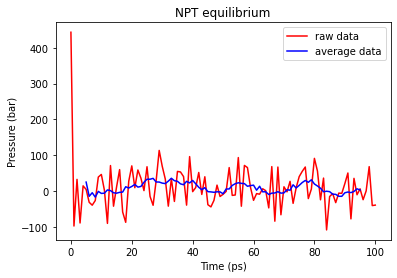

In [4]:
################################
# Parameters
variant = "lambda"
wkdir = f'Data/rawdata/md_results/variants_6m0j/{variant}'
################################

# plot
quickplotxvg(wkdir = wkdir, xvgfile = 'pressure_npt.xvg', title = "NPT equilibrium", 
            xlab = 'Time (ps)', ylab = 'Pressure (bar)',  ps2ns=False, with_moving_avg=True)

## Equilibrium npt (density)

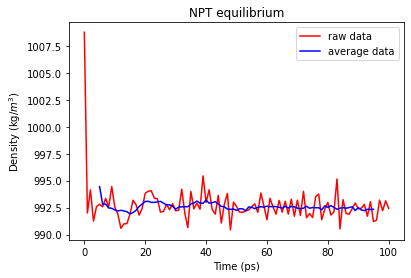

In [5]:
################################
# Parameters
variant = "lambda"
wkdir = f'Data/rawdata/md_results/variants_6m0j/{variant}'
################################

# plot
quickplotxvg(wkdir = wkdir, xvgfile = 'density_npt.xvg', title = "NPT equilibrium",
            xlab = 'Time (ps)', ylab = r'Density (kg/$m^{3}$)')

# Merge plot

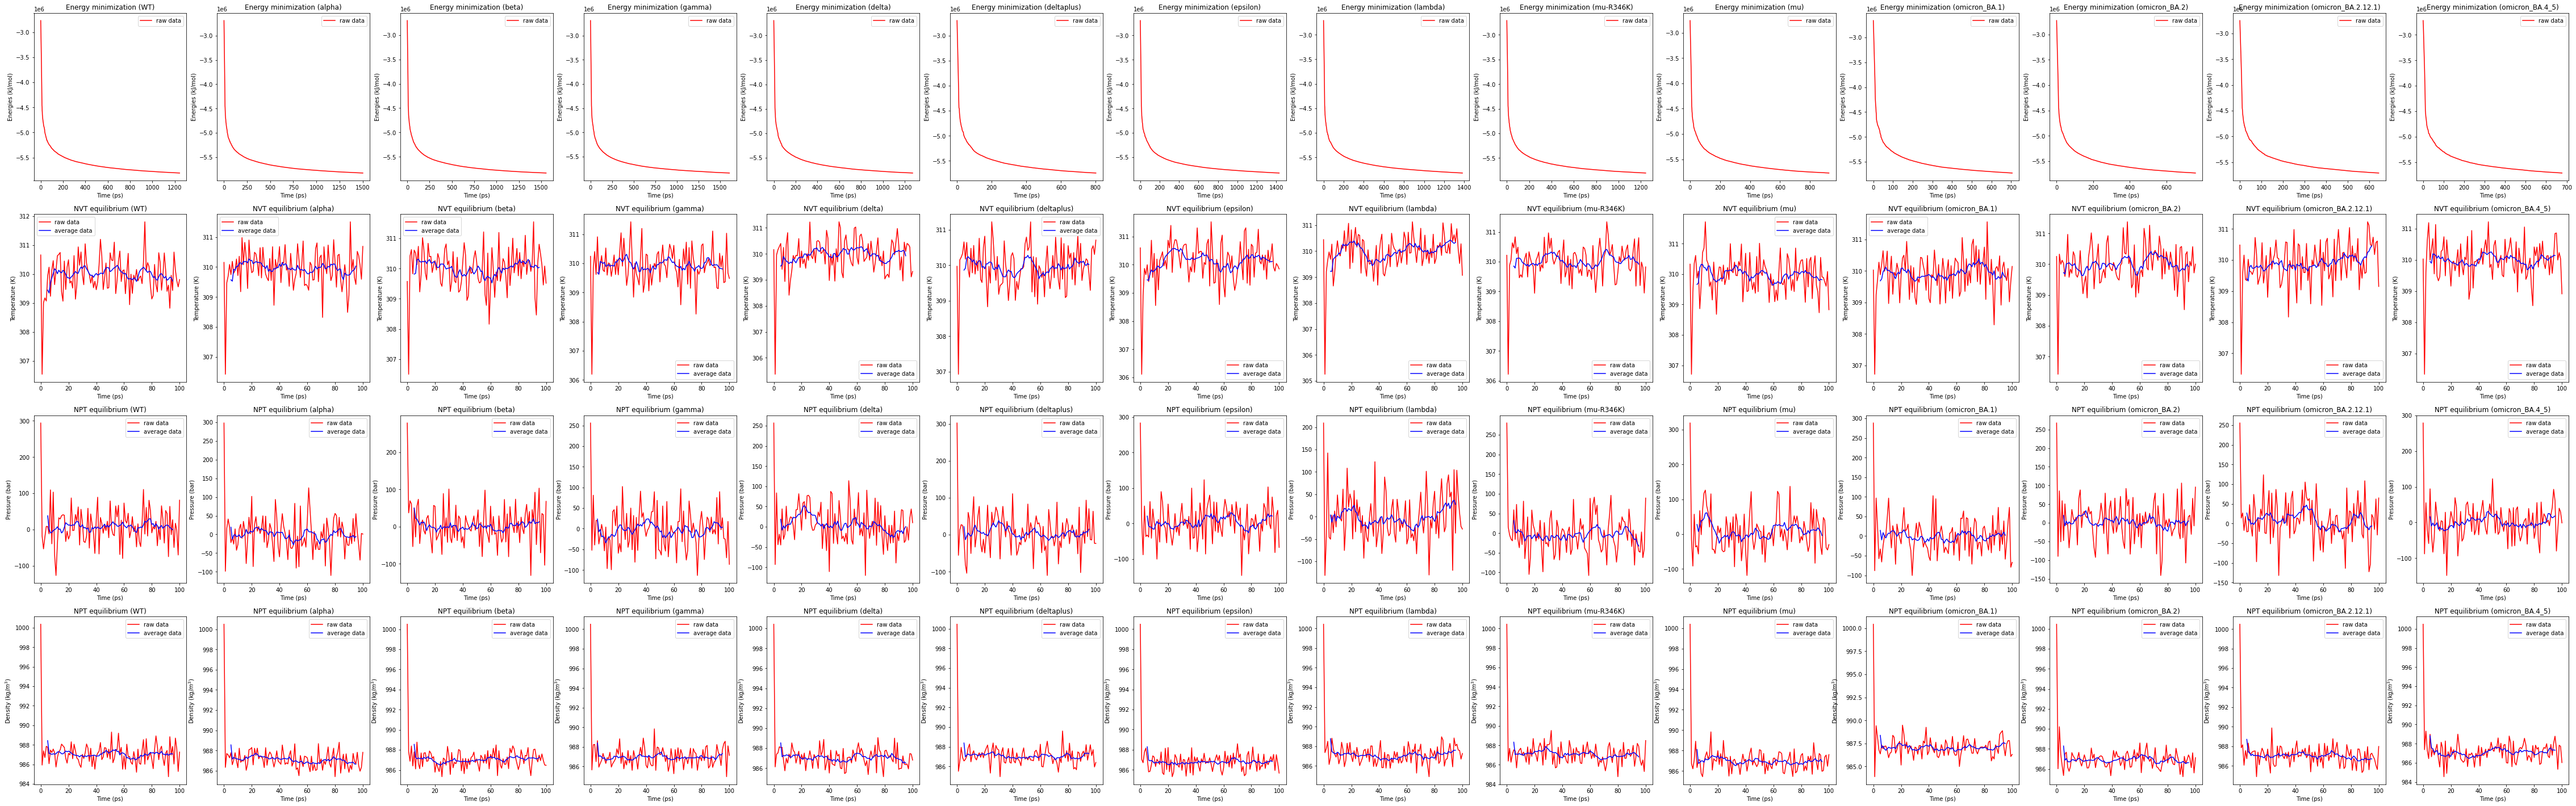

In [6]:

################################
# Parameters
parent_folder = '/Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub/Data/rawdata/md_results/variants_7a91'
#variants_path = ['variants_6m0j/WT', 'variants_7a91/WT', 'variants_7mjn/alpha', 'variants_7v80/beta', 'variants_7v84/gamma', 'variants_7v8b/delta']
variants_path = ['WT', 'alpha', 'beta', 'gamma', 'delta', 
                 'deltaplus', 'epsilon', 'lambda', 'mu-R346K', 'mu', 
                 'omicron_BA.1', 'omicron_BA.2', 'omicron_BA.2.12.1', 'omicron_BA.4_5']
variants_name = variants_path.copy()
#variants_name = ['WT_6m0j', 'WT_7a91', 'alpha_7mjn', 'beta_7v80', 'gamma_7v84', 'delta_7v8b']
eq_all = ['em', 'nvt','npt_pressure', 'npt_density']
###############################

fig, ax = plt.subplots(len(eq_all), len(variants_name), clear=True, figsize=(80,25))
for index_var, (variant, variant_path) in enumerate(zip(variants_name, variants_path)):
    wkdir = f'{parent_folder}/{variant_path}'
    for index_eq, eq in enumerate(eq_all):
        if eq == 'em':
            quickplotxvg(wkdir=wkdir, xvgfile="potential_em.xvg", title=f"Energy minimization ({variant})", 
                        xlab='Time (ps)', ylab='Energies (kJ/mol)', sci_y=True, with_moving_avg=False,
                        ax=ax[index_eq][index_var])
        elif eq == 'nvt':
            quickplotxvg(wkdir=wkdir, xvgfile="temperature_nvt.xvg", title=f"NVT equilibrium ({variant})", 
                        xlab='Time (ps)', ylab='Temperature (K)', with_moving_avg=True,
                        ax=ax[index_eq][index_var])
        elif eq == 'npt_pressure':
            quickplotxvg(wkdir = wkdir, xvgfile = 'pressure_npt.xvg', title = f"NPT equilibrium ({variant})", 
                        xlab = 'Time (ps)', ylab = 'Pressure (bar)',  ps2ns=False, with_moving_avg=True,
                        ax=ax[index_eq][index_var])
        else:
            quickplotxvg(wkdir = wkdir, xvgfile = 'density_npt.xvg', title = f"NPT equilibrium ({variant})", 
                        xlab = 'Time (ps)', ylab = r'Density (kg/$m^{3}$)',
                        ax=ax[index_eq][index_var])
